In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import  Input, Conv2D, Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model

## Explore the dataset

In [10]:
cifar10 = tf.keras.datasets.cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [11]:
print("X train shape: ",X_train.shape)
print("y train shape: ",y_train.shape)
print("X test shape: ",X_test.shape)
print("y test shape: ",y_test.shape)


X train shape:  (50000, 32, 32, 3)
y train shape:  (50000, 1)
X test shape:  (10000, 32, 32, 3)
y test shape:  (10000, 1)


In [13]:
y_train = y_train.flatten()
y_test = y_test.flatten()

print("y train shape: ",y_train.shape)
print("y test shape: ",y_test.shape)


y train shape:  (50000,)
y test shape:  (10000,)


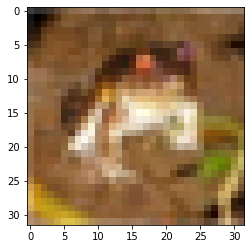

In [5]:
plt.imshow(X_train[0], cmap='gray');

In [14]:
y_train[0]

6

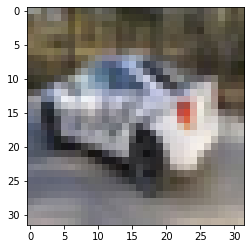

In [7]:
plt.imshow(X_train[980], cmap='gray');

In [15]:
y_train[980]

1

## Normalise the data

In [16]:
#Normalise the data
X_train, X_test = X_train/255.0, X_test/255.0

#Number of classes
K = len(set(y_train))
print("Number of classes:",K)

Number of classes: 10


## Build CNN model

In [19]:
# Build the model

i = Input(shape= X_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 50s 32ms/step - loss: 1.4325 - accuracy: 0.4777 - val_loss: 1.2128 - val_accuracy: 0.5599
Epoch 2/15
1563/1563 [==============================] - 48s 31ms/step - loss: 1.2378 - accuracy: 0.5555 - val_loss: 1.1005 - val_accuracy: 0.6045
Epoch 3/15
1563/1563 [==============================] - 47s 30ms/step - loss: 1.1273 - accuracy: 0.5967 - val_loss: 1.0334 - val_accuracy: 0.6309
Epoch 4/15
1563/1563 [==============================] - 49s 31ms/step - loss: 1.0467 - accuracy: 0.6261 - val_loss: 0.9943 - val_accuracy: 0.6428
Epoch 5/15
1563/1563 [==============================] - 46s 29ms/step - loss: 0.9788 - accuracy: 0.6526 - val_loss: 0.9863 - val_accuracy: 0.6520
Epoch 6/15
1563/1563 [==============================] - 48s 31ms/step - loss: 0.9215 - accuracy: 0.6730 - val_loss: 0.8976 - val_accuracy: 0.6890
Epoch 7/15
1563/1563 [==============================] - 49s 31ms/step - loss: 0.8786 - accuracy: 0.6872 - val_loss: 0.8682 -

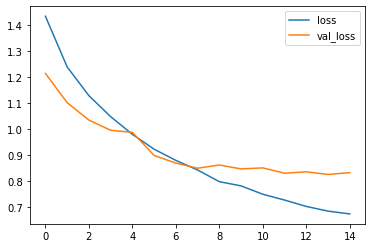

In [22]:
# Plot loss per iteration

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

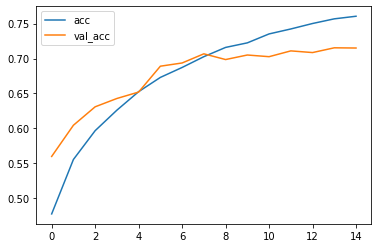

In [23]:
# Plot accuracy per iteration

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();

Confusion matrix, without normalization
[[776  27  23  15  16   5  15   8  83  32]
 [ 11 859   3   2   4   2  12   2  24  81]
 [ 89   7 540  58 123  53  80  21  18  11]
 [ 33  12  67 436  87 171 115  31  15  33]
 [ 33   6  62  45 689  25  62  65  10   3]
 [ 16   4  52 177  60 581  51  38   6  15]
 [  7  10  27  29  50  18 844   5   7   3]
 [ 24   4  25  43  63  43  13 764   5  16]
 [ 48  39   7   7   5   4   9   2 848  31]
 [ 43  78   8   9   5   5   7  12  20 813]]


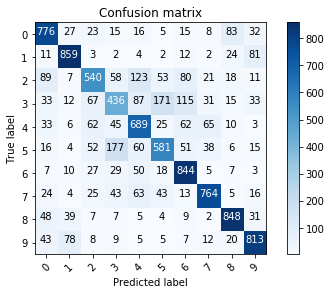

In [24]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()



y_pred = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, list(range(10)))


In [25]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

## Misclassified examples

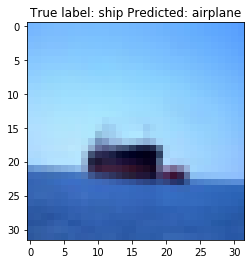

In [30]:
misclassified_idx1 = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified_idx1)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[y_pred[i]]));

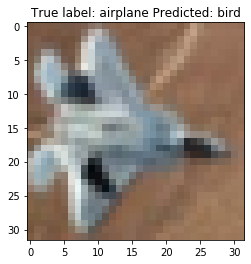

In [31]:
misclassified_idx1 = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified_idx1)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[y_pred[i]]));

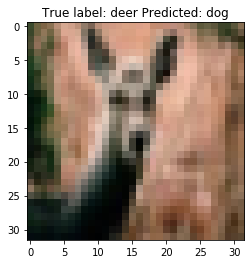

In [32]:
misclassified_idx1 = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified_idx1)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[y_pred[i]]));